# NLP Latent Semantic Analysis -- Kristofer Schobert

Here we will use Latent Semantic Analysis to analyse Jane Austen's *Emma*. We will compare paragraphs of her novel via these methods. After using tf-idf, which finds the most useful words for distinguishing paragraphs, we will perform Singular Value Decomposition on the data to find the 130 most significant compontents. With our paragraphs expressed as a unit vector in the 130 dimensional space, we calculate a similarity matrix (which contains all possible dot products between paragarphs) and determine which paragraphs are most similar.

This notebook is based on Thinkful's lesson on the topic. Here, we ask further questions, completes the intended challenges for the students, and discuss the process of LSA we work though this notebook.

In [1]:
# importing the packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [172]:
# downloading the text

import nltk
from nltk.corpus import gutenberg
nltk.download('punkt')
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split
import itertools

#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    #combine the list of lists of sentences list into one list containing all the words in the paragraphs
    para=list(itertools.chain.from_iterable(paragraph))
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

[nltk_data] Downloading package punkt to /Users/Kris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /Users/Kris/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [185]:
# how many paragraphs do we have total?
len(emma_paras)

2371

In [283]:
from sklearn.feature_extraction.text import TfidfVectorizer

# splitting the text into training and testing data with the ratio (60-40... this is Thinkful's decision)
X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', # we will leave this in although most stop words should be excluded with the max_df=0.5 cutoff
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
#After looking into this, I'm pretty sure this step can be omitted.
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original paragraph:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 4056
Original paragraph: A very few minutes more , however , completed the present trial . Mr . Weston , always alert when business was to be done , and as incapable of procrastinating any evil that was inevitable , as of foreseeing any that was doubtful , said , " It was time to go ;" and the young man , though he might and did sigh , could not but agree , to take leave .
Tf_idf vector: {'incapable': 0.30739173344681425, 'completed': 0.2958665784072963, 'foreseeing': 0.30739173344681425, 'inevitable': 0.28692697364483427, 'trial': 0.28692697364483427, 'alert': 0.2958665784072963, 'doubtful': 0.2591580249123855, 'minutes': 0.1938871873623443, 'young': 0.14660738400333312, 'leave': 0.19014033477044232, 'business': 0.19159729986360644, 'agree': 0.24032868094239881, 'said': 0.1085696333648859, 'sigh': 0.2334439945322204, 'time': 0.1315059686170425, 'evil': 0.2101309810552751, 'man': 0.14226593021060138, 'weston': 0.116042268757786, 'did': 0.1248134270578167, 'present':

In [290]:
vectorizer.fit(emma_paras).get_feature_names()[:80]

['000',
 '10',
 '28th',
 '_all_',
 '_at_',
 '_broke_',
 '_courtship_',
 '_elton_',
 '_first_',
 '_had_',
 '_has_',
 '_he_',
 '_her_',
 '_here_',
 '_him_',
 '_his_',
 '_home_',
 '_i_',
 '_is_',
 '_lady_',
 '_little_',
 '_may_',
 '_me_',
 '_miss_',
 '_more_',
 '_must_',
 '_my_',
 '_not_',
 '_now_',
 '_of_',
 '_one_',
 '_our_',
 '_own_',
 '_say_',
 '_shall_',
 '_she_',
 '_should_',
 '_some_',
 '_that_',
 '_the_',
 '_them_',
 '_then_',
 '_there_',
 '_to_',
 '_us_',
 '_very_',
 '_was_',
 '_we_',
 '_well_',
 '_will_',
 '_you_',
 '_your_',
 'abbey',
 'abilities',
 'able',
 'abominable',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absenting',
 'absolute',
 'absolutely',
 'absurdity',
 'abundance',
 'abusing',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accidental',
 'accidentally',
 'accommodate',
 'accommodation',
 'accommodations',
 'accompanied',
 'accompany']

In [291]:
vectorizer.fit(emma_paras).get_feature_names()[-20:-1]

['xv',
 'xvi',
 'xvii',
 'xviii',
 'yards',
 'ye',
 'year',
 'years',
 'yellow',
 'yes',
 'yesterday',
 'yield',
 'yielded',
 'yorkshire',
 'young',
 'younger',
 'youngest',
 'youth',
 'youthful']

We have 4056 features (useful words for identifying paragraphs). It looks like an handful of them have underscores on either side. I think this is some sort of translation error. These words are maybe italicized or something like that in the original novel? I'm not sure... We also have a few numbers, thousands of usual words, and some roman numerals. We did not remove the title of the book, or the "CHAPTER III" titles, so we are working with more than just usual paragraphs here. Still, this helps us to understand what is going on some. The paragraphs "CHAPTER III" better be have a coefficient near 1 for the "chapter" features.

In [189]:
print(X_train_tfidf)

  (1, 3406)	0.5490659836898636
  (1, 4045)	0.3589731762082287
  (1, 3350)	0.4143987240937782
  (1, 2471)	0.40369527367925007
  (1, 2096)	0.3964317147516731
  (1, 1057)	0.2789453769740423
  (2, 44)	0.2638909296943482
  (2, 1142)	0.2638909296943482
  (2, 1878)	0.2741705087350841
  (2, 485)	0.22463484480786117
  (2, 1992)	0.231149636772201
  (2, 1560)	0.24389449864983084
  (2, 486)	0.24940267677147265
  (2, 679)	0.2638909296943482
  (2, 2674)	0.20463841376334382
  (2, 2419)	0.18251863960469178
  (2, 49)	0.2638909296943482
  (2, 536)	0.17089050699849864
  (2, 651)	0.18742116884836538
  (2, 1164)	0.1503313489170268
  (2, 943)	0.15344047671072375
  (2, 3668)	0.1065372566802601
  (2, 3693)	0.11729351961793369
  (2, 2969)	0.2349144238485971
  (2, 1701)	0.11880144076099904
  :	:
  (1421, 2362)	0.0947724231279751
  (1421, 291)	0.14544858967456345
  (1421, 1295)	0.13012399793919716
  (1421, 4040)	0.15995560783309018
  (1421, 1383)	0.11970290474142045
  (1421, 3556)	0.17981180640565614
  (1421, 10

Here we see some of the entries of our sparce tf-idf array. The tf-idf coefficent in a cell is listed. A large coefficient informs us that that feature is strongly correlated with identifying that paragraph. Again, the rows coorespond to each paragraph and the columns are the features (the useful words).

In [293]:
tfidf_bypara[:4]

[{},
 {'solicitude': 0.5490659836898636,
  'yes': 0.3589731762082287,
  'sir': 0.4143987240937782,
  'obliged': 0.40369527367925007,
  'kind': 0.3964317147516731,
  'did': 0.2789453769740423},
 {'_us_': 0.2638909296943482,
  'disturb': 0.2638909296943482,
  'illiterate': 0.2741705087350841,
  'book': 0.22463484480786117,
  'inquire': 0.231149636772201,
  'forgetting': 0.24389449864983084,
  'books': 0.24940267677147265,
  'coarse': 0.2638909296943482,
  'plain': 0.20463841376334382,
  'need': 0.18251863960469178,
  '_will_': 0.2638909296943482,
  'business': 0.17089050699849864,
  'circumstance': 0.18742116884836538,
  'doubt': 0.1503313489170268,
  'deal': 0.15344047671072375,
  'thing': 0.1065372566802601,
  'time': 0.11729351961793369,
  'recommended': 0.2349144238485971,
  'great': 0.11880144076099904,
  'man': 0.25378120630728884,
  'think': 0.1065372566802601,
  'just': 0.13391114288416414,
  'rich': 0.21666138384932543},
 {'resolve': 0.1127265094641379,
  'diffidence': 0.1337068

Here we see the information in a more illuminating way. The zeroth paragraph has no features in it, but the next paragraph has six and 'solicitude' seems to be best at identifying this paragraph among the rest.

## Latent Semantic Analysis on Training Data

In [208]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to 130.
svd= TruncatedSVD(130)
# We force each 130-d vector representing a paragraph to have unit length.
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)


variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])




Percent variance captured by all components: 34.55756310282077
Component 0:
" If I made myself intelligible yesterday , this letter will be expected ; but expected or not , I know it will be read with candour and indulgence . You are all goodness , and I believe there will be need of even all your goodness to allow for some parts of my past conduct . But I have been forgiven by one who had still more to resent . My courage rises while I write . It is very difficult for the prosperous to be humble . I have already met with such success in two applications for pardon , that I may be in danger of thinking myself too sure of yours , and of those among your friends who have had any ground of offence . You must all endeavour to comprehend the exact nature of my situation when I first arrived at Randalls ; you must consider me as having a secret which was to be kept at all hazards . This was the fact . My right to place myself in a situation requiring such concealment , is another question . 

So we orignially had 1422 datapoints in our 4056 dimensional space. We could sum the variance of the projection of those 1422 points on each of the 4056 axis and get a value for the total variance of our training data. We now have found the best 130 orthogonal vectors that capture the most variance. If we sum the variance of the projection of the 1422 points onto these 130 axis we get 34.5% of that original variance. 

In [298]:
# home many paragraphs are in our training data?
len(X_train)

1422

In [299]:
i=1
print('Component {}:'.format(i))
print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Component 1:
CHAPTER I      0.998547
CHAPTER I      0.998547
CHAPTER V      0.998547
CHAPTER I      0.998547
CHAPTER V      0.998547
CHAPTER X      0.998547
CHAPTER X      0.998547
CHAPTER X      0.998547
CHAPTER V      0.998547
CHAPTER XII    0.997353
Name: 1, dtype: float64


It looks like component 1 is very related to the word CHAPTER. Let's see where that SVD component lies in the origianl 4056 dimensional space. It should be lying right next to the "chapter" axis.

In [300]:
# what is its max component in the 4000-d space. It should be CHAPTER
index, value = max(enumerate(svd.components_[1]), key=operator.itemgetter(1))
print(index, value)
print(terms[index])

609 0.9764131648046672
chapter


Good. This makes sense.

In [280]:
# what word is most strongly correlated with lsa component 0?
index, value = max(enumerate(svd.components_[0]), key=operator.itemgetter(1))
print(index)
print(terms[index])

2387
mr


Neat.

In [303]:
paras_by_component.head(3)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
That is _court_ .,-0.000115,0.009650,-0.279189,0.251559,-0.032897,-0.427954,-0.056747,0.203554,0.297260,-0.078139,...,-0.001650,0.107105,0.040901,-0.036465,0.101527,-0.102378,0.011515,-0.043558,-0.019532,0.017872
""" Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me .""",0.148190,-0.000269,0.082873,0.262616,0.015016,0.163282,0.054364,0.101294,-0.146194,-0.326116,...,0.058981,0.017374,-0.069421,0.036645,0.035658,-0.048113,-0.044676,0.046217,0.000279,-0.017097
""" How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended . He was a great deal too full of the market to think of any thing else which is just as it should be , for a thriving man . What has he to do with books ? And I have no doubt that he _will_ thrive , and be a very rich man in time and his being illiterate and coarse need not disturb _us_ .""",0.215195,-0.000331,-0.076082,0.162154,0.009025,-0.073155,-0.160502,-0.123518,0.040212,0.045654,...,0.063729,-0.014621,0.052751,-0.062513,-0.099769,0.060168,-0.056529,-0.082110,-0.039315,0.052465


In [304]:
paras_by_component.describe()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,...,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,0.237833,0.022975,-0.014955,0.013550,-0.009693,-0.012473,-0.004560,0.009401,-0.004370,-0.002489,...,0.000309,-0.001038,-0.000137,0.003428,0.000975,0.001128,0.002292,-0.001883,0.002501,0.000628
std,0.115879,0.146347,0.138728,0.127048,0.125580,0.124126,0.120194,0.117345,0.109168,0.103853,...,0.073282,0.074986,0.072617,0.075916,0.072851,0.071574,0.074462,0.073156,0.073091,0.075502
min,-0.000115,-0.001027,-0.346376,-0.445410,-0.417121,-0.427954,-0.278636,-0.481234,-0.292872,-0.475134,...,-0.287185,-0.395598,-0.299896,-0.296322,-0.279142,-0.291193,-0.462622,-0.388680,-0.247170,-0.412423
25%,0.156377,-0.000422,-0.096072,-0.056073,-0.084129,-0.088199,-0.080045,-0.053303,-0.072721,-0.056453,...,-0.041697,-0.042029,-0.045243,-0.040647,-0.044678,-0.040400,-0.040036,-0.044302,-0.040909,-0.043539
50%,0.238187,-0.000241,-0.033418,0.014292,-0.020950,-0.024992,-0.021965,0.007260,-0.011871,-0.010910,...,0.001535,0.000695,-0.000681,0.001294,-0.000530,0.000019,0.000054,0.000239,0.001917,0.001731
75%,0.314735,-0.000067,0.025182,0.076414,0.051099,0.045755,0.052996,0.081208,0.041185,0.042027,...,0.041618,0.044199,0.041795,0.043137,0.041582,0.044830,0.045863,0.040564,0.046072,0.040850
max,0.656723,0.998547,0.753416,0.620794,0.659200,0.529417,0.637023,0.413994,0.554832,0.636962,...,0.264641,0.274882,0.315783,0.494210,0.301809,0.294587,0.376285,0.371235,0.274580,0.320306


At first I was a bit confused as to why some of these values are negative, but this makes sense. When we construct our 130 new axis in the 4056 dimensional space they all brance from an new origin that is some point in the middle of all those training datapoints. So some of the datapoints are on the negative sides of those new axes.

Now, we will compute the similarity matrix to see how similar the paragraphs are. We have expressed each paragraph as a unit vector in the 130-dimensional SVD space, and we can take the dot product of these vectors (paragraphs) to find how similar they are. If the vectors point in the same direction, then they are similar. 



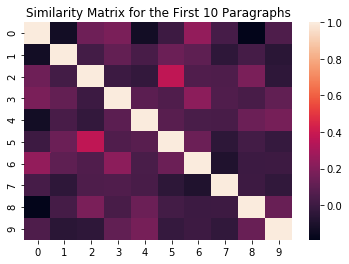

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended . He was a great deal too full of the market to think of any thing else  which is just as it should be , for a thriving man . What has he to do with books ? And I have no doubt that he _will_ thrive , and be a very rich man in time  and his being illiterate and coarse need not disturb _us_ ."
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity 

In [313]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.title('Similarity Matrix for the First 10 Paragraphs')
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

This is interesting. It seems that paragraphs 2 and 5 are the most similar of the first ten. They both have the word "man." They are both describing a man. These reasons and likely more give rise to the near 0.5 correlation coefficient of these paragraphs.  

# Drill 0: 
Apply the same LSA to the test set. 

Alright, so we will use the same 130 components and we can see where our testing data falls. 

In [315]:
# Run SVD on the Testing data, then project the Testing data.
X_test_lsa = lsa.transform(X_test_tfidf)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Component 0:
" So very obliging of you ! No rain at all . Nothing to signify . I do not care for myself . Quite thick shoes . And Jane declares  Well !( as soon as she was within the door ) Well ! This is brilliant indeed ! This is admirable ! Excellently contrived , upon my word . Nothing wanting . Could not have imagined it . So well lighted up ! Jane , Jane , look ! did you ever see any thing ? Oh ! Mr . Weston , you must really have had Aladdin ' s lamp . Good Mrs . Stokes would not know her own room again . I saw her as I came in ; she was standing in the entrance . ` Oh ! Mrs . Stokes ,' said I  but I had not time for more ." She was now met by Mrs . Weston . " Very well , I thank you , ma ' am . I hope you are quite well . Very happy to hear it . So afraid you might have a headache ! seeing you pass by so often , and knowing how much trouble you must have . Delighted to hear it indeed . Ah ! dear Mrs . Elton , so obliged to you for the carriage ! excellent time . Jane and I quit

This makes sense. The zeroth component points in a similar direction as the 'Mr' vector. There are many 'Mr' in those top paragraphs for the zeroth componenent. 'Chapter' is very appearent in all the component 1 paragraphs.

Let's see this similarity matrix for the testing data.

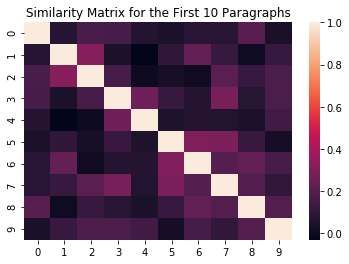

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it . The cold , however , was severe ; and by the time the second carriage was in motion , a few flakes of snow were finding their way down , and the sky had the appearance of being so overcharged as to want only a milder air to produce a very white world in a very short time .
1 " Oh ! no  none in the least . I never saw Mrs . Weston better in my life  never looking so well . Papa is only speaking his own regret ."
2 " Oh no , no ! the letter had much better be all your own . You will express yourself very properly , I am 

In [316]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_test).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.title('Similarity Matrix for the First 10 Paragraphs')
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

Well none of these first ten paragraphs are that similar... 

Let's move on to the next drill

# Drill 1: Optomizing our text for LSA

There are several things we can do to help our LSA's performance. We should use the lemmas of words rather than just the words. We could also get rid of the paragraphs like "Chapter IV", but for comparision with the original LSA model, let's leave that in. Using lemmas and changing the parameters of Truncated SVA should be plenty helpful. 

Let's take it from the top:


In [317]:
#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    #combine the list of lists of sentences list into one list containing all the words in the paragraphs
    para=list(itertools.chain.from_iterable(paragraph))
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [318]:
# splitting the text into training and testing data with the ratio (60-40... this is Thinkful's decision)
X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

In [373]:
import spacy

#import spacy's english model
nlp = spacy.load('en')


#this may not be the most efficient way to do this but it works...

# initialize the list that will contain paragraphs expressed in lemmas only.
# e.g. emma_lemma_para[4] will be the fourth paragraph writen in lemma form.  
emma_lemma_para = []

# loop through each paragraph in emma_paras
# I would just have spacy break up the paragraphs but spacy has no easy way of doing this
# Spacy can separate sentences easily but not paragraphs
for paragraph in emma_paras:
    # creating a list of all the individual words (and punctuation) for each paragraph
    words_list = paragraph.split()
    # initializing a list of lemmas for the paragraph at hand
    lemmas_list = []
    
    #looping through each word of the paragraph at hand
    for word in words_list:
        
        #have spacy analyse each word individually. (I suspect this is an inefficient way to do this)
        nlp_word = nlp(word)
        
        # droping all punction and stop words here (we wont be needing to drop stop words in TruncateSVD)
        # we have to use nlp_word[0] since nlp_word is thought of as a document 
        # (we are not using spacy the expected way)
        if not nlp_word[0].is_punct and not nlp_word[0].is_stop:
            
            # adding this lemma to the list of lemmas for this paragraph
            lemmas_list.append(nlp_word[0].lemma_)
    
    # joining the lists of lemmas for this paragraph together with a spacebar. 
    # appending this string of lemmas for this paragraph to emma_lemma_para which contains the elements that are long
    # strings of the paragraphs expressed as lemmas
    emma_lemma_para.append(' '.join(lemmas_list))        

        
    

In [375]:
emma_lemma_para[:7]

['Emma Jane Austen 1816',
 'volume',
 'chapter',
 'Emma woodhouse handsome clever rich comfortable home happy disposition unite good blessing existence live nearly year world little distress vex',
 'young daughter affectionate indulgent father consequence sister s marriage mistress house early period mother die long ago indistinct remembrance caress place supply excellent woman governess fall little short mother affection',
 'sixteen year Miss Taylor Mr woodhouse s family governess friend fond daughter particularly Emma intimacy sister Miss Taylor cease hold nominal office governess mildness temper hardly allow impose restraint shadow authority long pass away live friend friend mutually attach Emma like highly esteem Miss Taylor s judgment direct chiefly',
 'real evil Emma s situation power have way disposition think little disadvantage threaten alloy enjoyment danger present unperceived mean rank misfortune']

In [380]:
from sklearn.feature_extraction.text import TfidfVectorizer

# splitting the text into training and testing data with the ratio (60-40... this is Thinkful's decision)
X_train, X_test = train_test_split(emma_lemma_para, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', # most of the stop words should have been excluded during our conversion to lemma treatment. still lets use this.
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_lemma_para)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
#After looking into this, I'm pretty sure this step can be omitted.
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original lemma-paragraph:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 3031
Original lemma-paragraph: minute complete present trial Mr Weston alert business incapable procrastinate evil inevitable foresee doubtful say time young man sigh agree leave
Tf_idf vector: {'incapable': 0.3298125748410525, 'inevitable': 0.3078551362069309, 'trial': 0.3078551362069309, 'alert': 0.31744678667751547, 'doubtful': 0.27806074850696777, 'minute': 0.198269235877663, 'foresee': 0.27022379944112623, 'complete': 0.24042941174116314, 'business': 0.20557221266831102, 'agree': 0.2163747661819054, 'say': 0.11148148166693936, 'sigh': 0.2353666003682741, 'time': 0.13687206235722735, 'man': 0.14802098531457406, 'weston': 0.12390676356368481, 'leave': 0.16881198100695655, 'present': 0.18220532922765917, 'evil': 0.2143751398103249, 'mr': 0.09287997947257269, 'young': 0.15577455081327593}


In [381]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to 130.
svd= TruncatedSVD(130)
# We force each 130-d vector representing a paragraph to have unit length.
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)


variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 39.27976767217775
Component 0:
intelligible yesterday letter expect expect know read candour indulgence goodness believe nee goodness allow part past conduct forgive resent courage rise write difficult prosperous humble meet success application pardon danger think sure friend ground offence endeavour comprehend exact nature situation arrive randall consider have secret keep hazard fact right place situation require concealment question shall discuss temptation right refer caviller brick house sashe window casement highbury dare address openly difficulty state Enscombe know require definition fortunate prevail part Weymouth induce upright female mind creation stoop charity secret engagement refuse go mad ready hope look forward thing thing time chance circumstance slow effect sudden burst perseverance weariness health sickness possibility good blessing secure obtain promise faith correspondence nee farther explanation honour dear madam husban

We now capture 39.2% of the variance with 130 components rather than 35.5% when we did not work with lemmas.

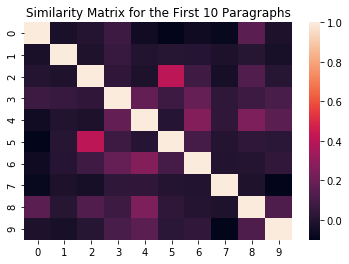

Key:
0 
1 yes sir oblige kind solicitude
2 business engrosse plain circumstance forget inquire book recommend great deal market think thing thrive man book doubt thrive rich man time illiterate coarse nee disturb
3 restrain manner immediately prepare speak exquisite calmness gravity weather night scarcely begin scarcely pass sweep gate join carriage find subject cut hand seize attention demand Mr Elton actually make violent love avail precious opportunity declare sentiment know hope fear adore ready die refuse flatter ardent attachment unequalle love unexample passion fail have effect short resolve seriously accept soon possible scruple apology apparent diffidence Mr Elton lover Harriet profess lover try stop vainly angry think moment resolve restrain speak feel half folly drunkenness hope belong pass hour accordingly mixture playful hope good suit half half state reply
4 Emma smile answer visit use nervous complaint hope charm away sore throat severe cold Mr perry probably hear
5 minu

In [382]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.title('Similarity Matrix for the First 10 Paragraphs')
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

Paragraph 2 and 5 look similar again and yes, these are the same two sentence as when we were not working with lemmas.

As they were before:

2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended . He was a great deal too full of the market to think of any thing else  which is just as it should be , for a thriving man . What has he to do with books ? And I have no doubt that he _will_ thrive , and be a very rich man in time  and his being illiterate and coarse need not disturb _us_ ."

5 A very few minutes more , however , completed the present trial . Mr . Weston , always alert when business was to be done , and as incapable of procrastinating any evil that was inevitable , as of foreseeing any that was doubtful , said , " It was time to go ;" and the young man , though he might and did sigh , could not but agree , to take leave .

So the same reasoning applies. Interesting.

Now let's apply the same model to our testing data. 

In [383]:
# Run SVD on the Testing data, then project the Testing data.
X_test_lsa = lsa.transform(X_test_tfidf)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Component 0:
oblige rain signify care thick shoe Jane declare soon door brilliant admirable excellently contrive word want imagine light Jane Jane look thing oh Mr Weston Aladdin s lamp good mrs Stokes know room see come stand entrance ` oh mrs Stokes say time meet mrs Weston thank ma hope happy hear afraid headache see pass know trouble Delighted hear ah dear mrs Elton oblige carriage excellent time Jane ready horse moment comfortable carriage oh sure thank mrs Weston score mrs Elton kindly send Jane note offer day neighbour say mother ` word ma thank mother remarkably go Mr woodhouse s shawl evening warm large new shawl mrs Dixon s wedding present kind think mother buy Weymouth know Mr Dixon s choice Jane say hesitate time Colonel Campbell prefer olive dear Jane sure wet foot drop afraid Mr Frank churchill extremely mat step shall forget extreme politeness oh Mr Frank churchill tell mother s spectacle fault rivet come mother talk good nature Jane talk Mr Frank churchill ah s Miss woo

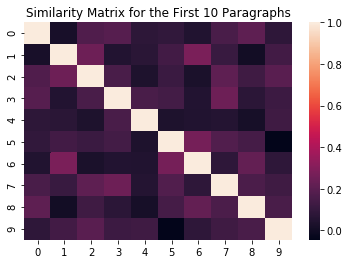

Key:
0 Mr woodhouse completely mind visit spite increase coldness idea shrink set forward punctually eld daughter carriage apparent consciousness weather wonder go pleasure afford randall cold wrapt feel cold severe time second carriage motion flake snow find way sky appearance overcharge want milder air produce white world short time
1 oh see mrs Weston better life look papa speak regret
2 oh letter better express properly sure danger intelligible thing meaning unequivocal doubt demur expression gratitude concern pain inflict propriety require present unbidden mind persuade nee prompt write appearance sorrow disappointment
3 Jane fairfax s history fall good hand know kindness campbell give excellent education live constantly right minded inform people heart understanding receive advantage discipline culture Colonel Campbell s residence London light talent justice attendance rate master disposition ability equally worthy friendship eighteen nineteen far early age qualify care child ful

In [384]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_test).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.title('Similarity Matrix for the First 10 Paragraphs')
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

These again are similar results as last time for the testing data

## Conclusion

LSA is very interesting. I never thought much about how one can relate two documents based on the kinds of words they use, but you certainly can. It is really intersting to see how some paragraphs are more like the others based on the combinations of words they are using. 

The mathematics of tf-idf and SVA is also really intreguing. I understand some of it, but I plan on trying to understand the linear algebra underlying it more throughly. I hadnt realized one could mary linear algebra and novels... but one certainly can. 

## Furture Thoughts

It would be need to see how similar and different certain chapters of a book are. Does the book have a stark contrast between to adjacent chapters? This would be a sudden change in the book, like some dramatic shift in the story. Maybe something goes terribly wrong in a previously happy city. I'm definitely interesting in the path a novel takes from beginning to end. What is the trajectory of a novel be in an LSA landscape?